In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Suppress verbose logging
tf.get_logger().setLevel('ERROR')
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.17.1


In [3]:
# Import MNIST
def load_mnist_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    print('x_train shape: ', x_train.shape)
    print('y_train shape: ', y_train.shape)
    print('x_test shape: ', x_test.shape)
    print('y_test shape: ', y_test.shape)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_mnist_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [4]:
# Reshape and normalize the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0

In [5]:
# One-hot encoding the labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [6]:
# Creating the CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compiling the CNN model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training the CNN model
history = model.fit(
    x_train, y_train_encoded,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8617 - loss: 0.4502 - val_accuracy: 0.9796 - val_loss: 0.0676
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9817 - loss: 0.0562 - val_accuracy: 0.9839 - val_loss: 0.0532
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9881 - val_loss: 0.0407
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9886 - val_loss: 0.0388
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.9900 - val_loss: 0.0368
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9873 - val_loss: 0.0435
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9945 - loss: 0.0161 - val_accuracy: 0.9879 - val_loss: 0.0450
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0097 - val_accuracy: 0.

In [10]:
# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print('Test set accuracy: {:.2f}%'.format(accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9880 - loss: 0.0435
Test set accuracy: 99.13%


In [11]:
# Making predictions
preds = model.predict(x_test)
print("Shape of predictions: ", preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of predictions:  (10000, 10)


In [12]:
# Plotting some predictions
from matplotlib import pyplot as plt
import numpy as np

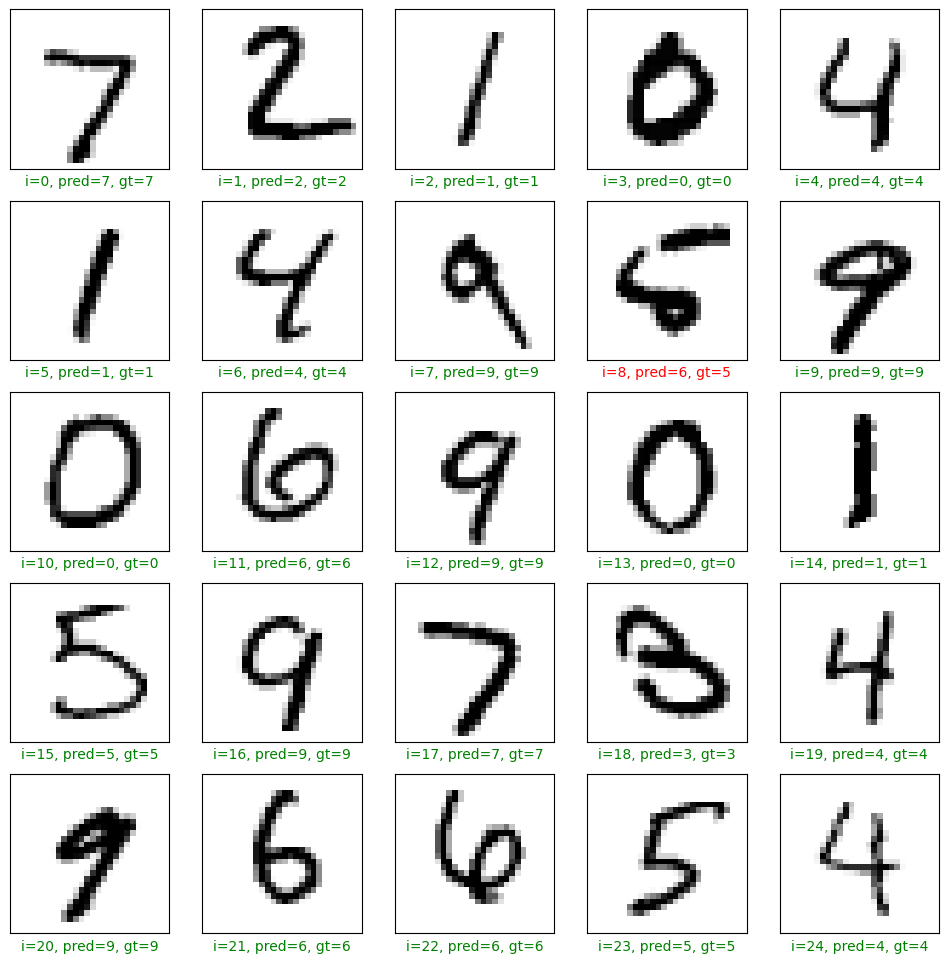

In [13]:
# Plotting some predictions
from matplotlib import pyplot as plt
import numpy as np

def plot_predictions(x_test, y_test, preds):
    plt.figure(figsize=(12, 12))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        pred = np.argmax(preds[i])
        gt = np.argmax(y_test[i])

        col = 'g' if pred == gt else 'r'
        plt.xlabel(f'i={i}, pred={pred}, gt={gt}', color=col)
        plt.imshow(x_test[i].reshape(28, 28), cmap='binary')
    plt.show()

plot_predictions(x_test, y_test_encoded, preds)


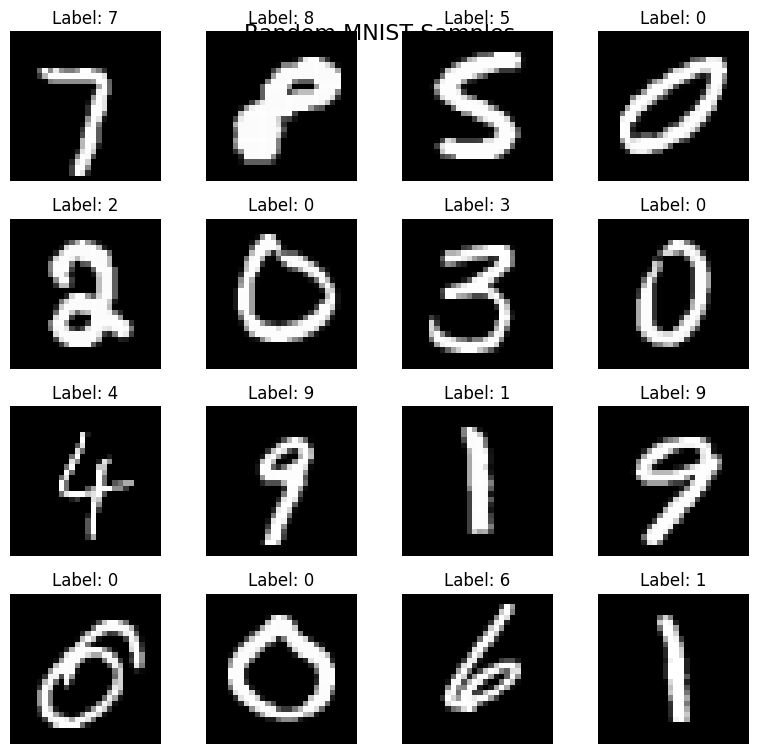

In [16]:
# Visualizing a random subset of MNIST images with their labels
import random

# Selecting a random sample of 16 images and their corresponding labels
sample_indices = random.sample(range(x_train.shape[0]), 16)
sample_images = x_train[sample_indices].squeeze()  # Remove channel dimension for display
sample_labels = y_train[sample_indices]

# Plotting the images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Random MNIST Samples', fontsize=16, y=0.92)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(sample_images[i], cmap='gray')
    ax.set_title(f"Label: {sample_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

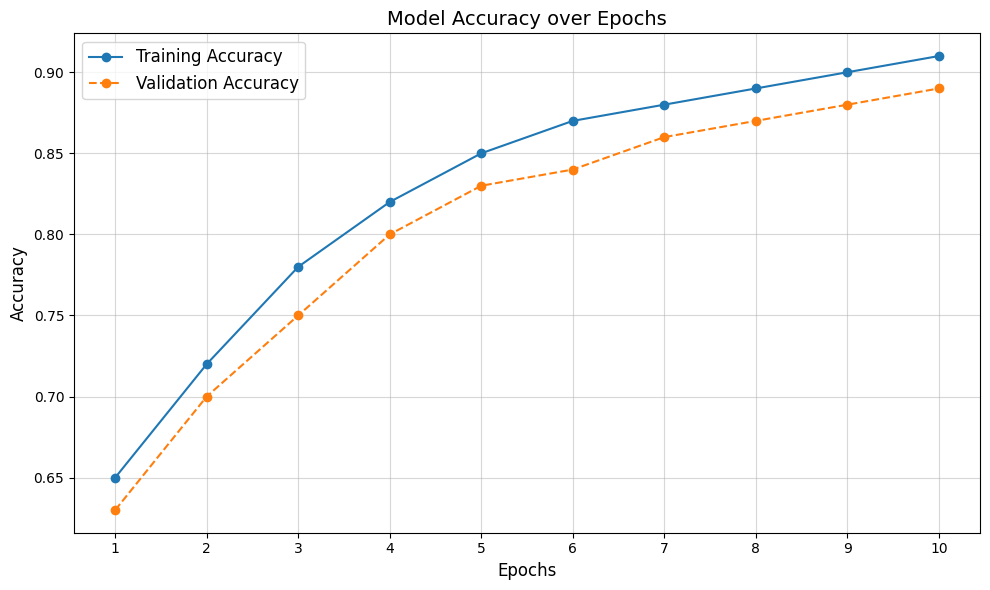

In [14]:

# Simulated data for accuracy values across epochs
epochs = np.arange(1, 11)  # 10 epochs
train_accuracy = [0.65, 0.72, 0.78, 0.82, 0.85, 0.87, 0.88, 0.89, 0.90, 0.91]
val_accuracy = [0.63, 0.70, 0.75, 0.80, 0.83, 0.84, 0.86, 0.87, 0.88, 0.89]

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', linestyle='--')
plt.title('Model Accuracy over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
